<a href="https://colab.research.google.com/github/RenataLi/CourseWork_2023/blob/main/CourseWork_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# CourseWork2022

This study is aimed at studying the feature space as well as studying the influence of various features on model learning. Also, in this project, we set up experiments, considering various indices and their attributes to further identify more global conclusions on how, given the specifics of companies, stock price prediction can be improved.

## Data preprocessing

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
import xgboost as xgb
import plotly.graph_objects as go
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.applications.densenet import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

Installing the necessary libraries

In [2]:
!pip install catboost
!pip install tensorflow
!pip install keras
!pip install shap
!pip install lime
!pip install darts
!pip install torch pytorch-lightning pytorch_forecasting
!pip install -U lightautoml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 15.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=9dfe05a03cdd22e4b0a5e2c2f64d6ceae6cbd41750e354d1e0d7733f18e1e7bf
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede

In [9]:
file_names = ['/content/drive/MyDrive/Processed_DJI.csv','/content/drive/MyDrive/Processed_NASDAQ.csv', '/content/drive/MyDrive/Processed_NYSE.csv', '/content/drive/MyDrive/Processed_RUSSELL.csv', '/content/drive/MyDrive/Processed_S&P.csv',
              '/content/drive/MyDrive/TecDAX.csv','/content/drive/MyDrive/Euro Stoxx 50.csv','/content/drive/MyDrive/SMI.csv']

dji_data = pd.read_csv(file_names[0], parse_dates=['Date'],index_col='Date')
nasdaq_data = pd.read_csv(file_names[1], parse_dates=['Date'],index_col='Date')
nyse_data = pd.read_csv(file_names[2], parse_dates=['Date'],index_col='Date')
russell_data = pd.read_csv(file_names[3], parse_dates=['Date'],index_col='Date')
sp_data = pd.read_csv(file_names[4], parse_dates=['Date'],index_col='Date')
tecdax_data = pd.read_csv(file_names[5], parse_dates=['Date'],index_col='Date')
eurostoxx_data = pd.read_csv(file_names[6], parse_dates=['Date'],index_col='Date')
smi_data = pd.read_csv(file_names[7], parse_dates=['Date'],index_col='Date')

<a href="https://data.mendeley.com/datasets/byjnr4kz5v/3" target="_blank">Daily features of S&P 500, NASDAQ Composite, Dow Jones Industrial Average, RUSSELL 2000, and NYSE Composite from 2010 to 2017</a>

This dataset contains several daily features of **S&P 500**, **NASDAQ Composite**, **Dow Jones Industrial Average**, **RUSSELL 2000**, and **NYSE Composite** from 2010 to 2017. It covers features from various categories of technical indicators, futures contracts, price of commodities, important indices of markets around the world, price of major companies in the U.S. market, and treasury bill rates. Sources and thorough description of features have been mentioned in the paper of "CNNpred: CNN-based stock market prediction using a diverse set of variables".


More about this data:

This data uses 82 variables to represent each day of each index. The dataset contains those variables that depend on the index and those that are general economic variables and are replicated for each index in the dataset .

They are divided into 8 different groups:
- primitive variables, technical indicators(For example  `MOM-1`, `MOM-2`, `MOM-3`, `ROC-5`, `ROC-10`, `ROC-15`, `ROC-20`, `EMA-10`, `EMA-20`, `EMA-50`, `EMA-200`, `DTB4WK` ) 
- world stock market indices(`IXIC`, `GSPC`, `DJI`, `NYSE`, `RUSSELL`, `HSI`, `SSE`, `FCHI`, `FTSE`, `GDAXI`)
- the exchange rate of the US dollar to other currencies (`USD-Y`, `USD-GBP`, `USD-CAD`, `USD-CNY`, `USD-AUD`, `USD-NZD`, `USD-CHF`, `USD-EUR`) 
- commodities (`Oil`, `Gold`, `Gold-F`, `Gas`, `Silver`, `Copper`, `XAU-USD`)
- from large companies in the US markets (`USDX`, `XOM`, `JPM`, `AAPL`, `MSFT`, `GE`, `JNJ`, `WFC`, `AMZN`)
- futures contracts (`FCHI-F`, `FTSE-F`, `GDAXI-F`, `HSI-F`, `Nikkei-F`)
- other useful variables (`DTB4WK`, `DTB3`, `DGS10`)


Consider the Russell Index data and consider the closing price of the stock from 2010 to 2017.

Text(0, 0.5, 'Prices ($)')

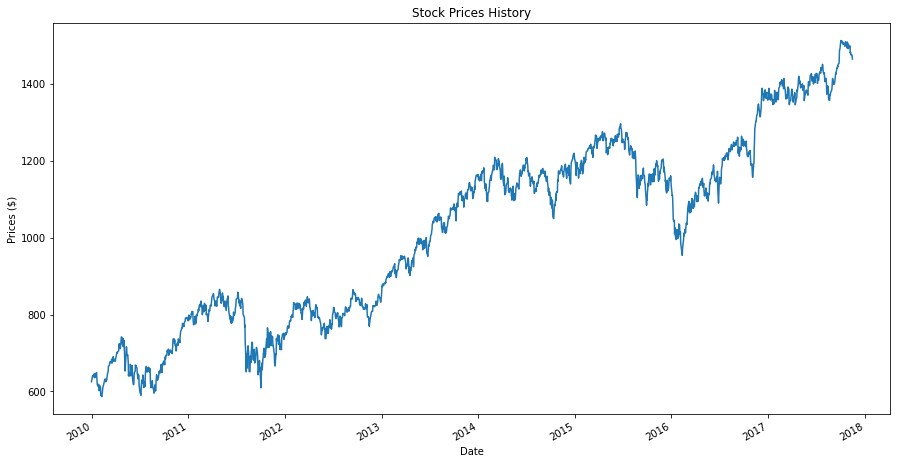

In [17]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
russell_data['Close'].plot()
plt.xlabel('Date')
plt.ylabel('Prices ($)')

Consider the trend and seasonality of this dataset.

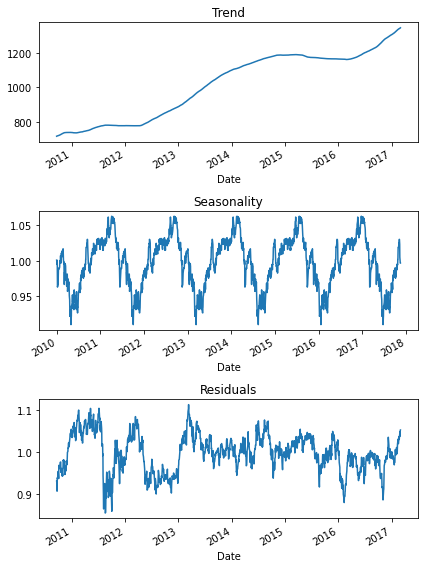

In [18]:
decomposed = seasonal_decompose(russell_data['Close'], model='multiplicative',period=360)

plt.figure(figsize=(6, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

Let's take a closer look at seasonality per year.

<AxesSubplot:xlabel='Date'>

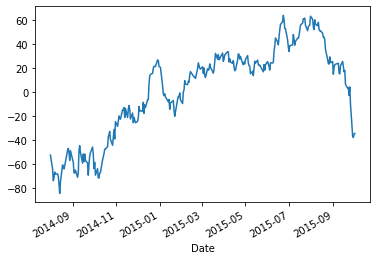

In [19]:
decomposed = seasonal_decompose(russell_data['Close'], model='additive',  period=360)

decomposed.seasonal['2014-08-01':'2015-10-01'].plot(ax=plt.gca())

As you can see, there is no particularly strong regularity in the year, but there is a regularity approximately more than a year (13 months). This information will help us generate better features for more efficient model training.

## Make Features

Let's transform the data. To do this, we will leave a small number of features from different groups of features and generate new features.

In [20]:
data = russell_data[['Close','Volume','Oil','Gold','AMZN','AAPL','S&P','NYSE',	'Dollar index-F',	'Dollar index',	'wheat-F'	,'XAG',	'XAU']]
data

,Close,Volume,Oil,Gold,AMZN,AAPL,S&P,NYSE,Dollar index-F,Dollar index,wheat-F,XAG,XAU
Date,,,,,,,,,,,,,
2009-12-31,625.390015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.08,-0.06,-0.48,0.30,0.39
2010-01-04,640.099976,0.921723,0.026830,0.000000,-0.004609,0.015565,0.016043,0.019733,-0.59,-0.42,3.12,3.91,2.10
2010-01-05,638.489990,-0.375903,0.002699,0.001560,0.005900,0.001729,0.003116,0.003839,0.03,0.12,-0.90,1.42,-0.12
2010-01-06,637.950012,0.996234,0.016883,0.006009,-0.018116,-0.015906,0.000546,0.003104,-0.24,-0.17,2.62,2.25,1.77
2010-01-07,641.969971,0.059932,-0.006256,0.000221,-0.017013,-0.001849,0.004001,0.002200,0.58,0.54,-1.85,0.22,-0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-09,1475.020020,-0.017375,0.005984,0.000623,-0.003310,-0.002043,-0.003762,-0.003638,-0.44,-0.45,0.53,-0.26,0.32
2017-11-10,1475.270020,-0.089962,-0.007173,-0.000389,-0.003348,-0.006880,-0.000898,-0.001383,-0.07,-0.05,0.70,-0.71,-0.80
2017-11-13,1475.069946,-0.024084,0.000352,-0.004944,0.003395,-0.004008,0.000984,-0.000469,0.12,0.11,-1.85,0.83,0.16


Rolling mean, or moving average, is a method of smoothing time series. Its essence lies in the search for values that are least susceptible to fluctuations, that is, arithmetic averages.

Lagging values (lag) can tell whether the function x(t) will grow or decrease. They can be obtained by the shift() function.

The Relative Strength Index technical indicator was also generated, which can show whether the stock was overbought or oversold.

For clarity, let's depict lag and moving average with a window of 50 days on the Russell index data.

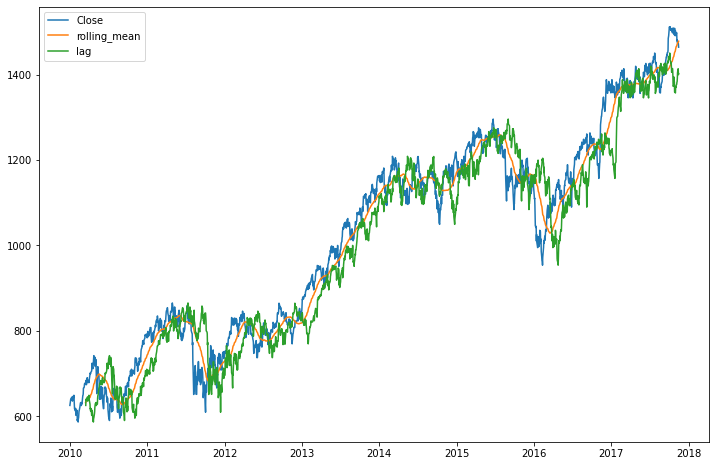

In [21]:
plt.figure(figsize=(12, 8))
plt.plot(russell_data['Close'], label='Close');
plt.plot(russell_data['Close'].rolling(50).mean(), label='rolling_mean');
plt.plot(russell_data['Close'].shift(50), label='lag');
plt.legend();

In [10]:
def make_features(data, max_lag, rolling_mean_size):
    data['dayofweek'] = data.index.dayofweek
    data['year'] = data.index.year
    data['month'] = data.index.month

    for lag in range(1, max_lag + 1,50):
        data['lag_{}'.format(lag)] = data['Close'].shift(lag)
    
    for size in range(1, rolling_mean_size + 1,100):
        data['rolling_mean_{}'.format(size)] = data['Close'].shift().rolling(size).mean()

    #data['rolling_mean'] = data['Close'].shift().rolling(rolling_mean_size).mean()

In [23]:
def relative_strength_idx(df, n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

In [24]:
make_features(data, 390, 390)
data = data.drop('Volume', axis=1)
data['RSI'] = relative_strength_idx(data).fillna(0)

EMA_12 = pd.Series(data['Close'].ewm(span=12, min_periods=12).mean())
EMA_26 = pd.Series(data['Close'].ewm(span=26, min_periods=26).mean())
data['MACD'] = pd.Series(EMA_12 - EMA_26)
data['MACD_signal'] = pd.Series(data.MACD.ewm(span=9, min_periods=9).mean())
data['Close'] = data['Close'].shift(-1)
data = data.iloc[33:] # Because of moving averages and MACD line
data = data[:-1] 

data = data.fillna(0)

<ipython-input-22-b70c7712e94e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dayofweek'] = data.index.dayofweek
<ipython-input-22-b70c7712e94e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data.index.year
<ipython-input-22-b70c7712e94e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In order to check whether the learning quality of the model improves by adding technical indicators of one index to another index, first all models were trained on a fixed dataset with generated attributes, and then the models were trained on a dataset to which the attributes of other indexes were added afterward and metrics were compared with a dataset without these attributes.

In [25]:
models_dict = {}
models_dict1 = {}
models_dict['RUSSELL'] = {}
models_dict['RUSSELL+NASDAQ'] = {}
models_dict1['NYSE'] = {}
models_dict1['NYSE+NASDAQ'] = {}
models_dict1['NYSE+NASDAQ+SP'] = {}
# models_dict1['NYSE+NASDAQ+SP+RUSSELL'] = {}

In [26]:
number_feature = data.shape[1]
samples_in_each_stock = data.shape[0]
print('Samples',samples_in_each_stock)
print('Number of features', number_feature)

Samples 1950
Number of features 30


## Train and Test  Splitting

In [27]:
def train_test_y_x_split(data): 
  train, test = train_test_split(data, test_size=0.2, random_state=12345, shuffle=False)
  train = train.dropna()
  ## Fit on train and test
  features = data.drop('Close',axis=1)

  features_train = train.drop('Close', axis=1)
  target_train = train['Close']
  features_test = test.drop('Close', axis=1)
  target_test = test['Close']
  scaler = MinMaxScaler()
  scaler.fit(features)
  features_train = scaler.transform(features_train)
  features_test = scaler.transform(features_test)
  return train,test,features_train,target_train,features_test,target_test

In [28]:
train,test,features_train,target_train,features_test,target_test = train_test_y_x_split(data)
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train.Close, name='Training'))
fig.add_trace(go.Scatter(x=test.index,  y=test.Close,  name='Test'))
fig.show()

## Adequacy check

Checking for adequacy with a constant value

In [29]:
mean_close = test['Close'].mean()
print("Средний цена закрытия акции в день:", mean_close)
pred_median = train['Close'].median()
mae_close =  mean_absolute_error(y_pred=pd.Series([pred_median] * len(test)), y_true=test['Close'])
print("MAE:", mae_close)
print(mae_close/mean_close)

Средний цена закрытия акции в день: 1329.3665630641026
MAE: 394.9315655641026
0.29708251774725797


Checking for adequacy with the previous value of the series

In [30]:
print("Средний цена закрытия:", test['Close'].mean())
pred_previous = test['Close'].shift(fill_value=train.iloc[len(train) - 1, 0])
print("MAE:", mean_absolute_error(y_true=test['Close'], y_pred=pred_previous))
print(mean_absolute_error(y_true=test['Close'], y_pred=pred_previous)/mean_close)

Средний цена закрытия: 1329.3665630641026
MAE: 8.74007538974359
0.006574616537366706


In [31]:
def smape(A, F):
    return 100 / len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))
def metrics(model,y_true, y_pred,features_test):
    r2 =  r2_score(y_true,y_pred)
    rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
    mape =  mean_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
    print('R2 Score:',r2)
    print('RMSE:',rmse)
    print('MAPE:', mape)
    return r2,rmse,mape

## RandomForestRegressor

In [32]:
# %%time
# model = RandomForestRegressor(random_state=12345)
# params = {'n_estimators': range(100, 601, 50), 'max_depth': range(5, 51, 10)}
# cv = TimeSeriesSplit(n_splits=5)
# grid = GridSearchCV(model, params, n_jobs=-1, verbose=True, cv=cv, scoring='r2')
# grid.fit(features_train, target_train)
# print('Лучшие параметры:', grid.best_params_)
# print('Лучший счет:', grid.best_score_)

In [33]:
# def random_forest_predict(features_train,target_train,features_test,target_test):  
#   forest = RandomForestRegressor(max_depth=35, n_estimators=600, random_state=12345)
#   forest.fit(features_train, target_train)
#   y_pred = forest.predict(features_test)
#   print(metrics(target_test,y_pred))
#   return y_pred

# def catboost_predict(features_train,target_train,features_test,target_test):
#   model_cat = CatBoostRegressor(depth=best_depth, learning_rate=best_learning_rate, l2_leaf_reg= best_l2, loss_function='MAPE',verbose=False)
#   model_cat.fit(features_train, target_train)
#   return model_cat.predict(features_test),model_cat

# def linear_predict(features_train,target_train,features_test,target_test):
#     model = LinearRegression()
#     model.fit(features_train,target_train)
#     y_pred = model.predict(features_test)
#     return y_pred

In [34]:
forest = RandomForestRegressor(max_depth=6, n_estimators=400, random_state=12345)
forest.fit(features_train, target_train)
y_pred = forest.predict(features_test)
r2,rmse,mape = metrics(forest,target_test,y_pred,features_test)
models_dict['RUSSELL']['Random_forest']  = {'r2':r2,'rmse':rmse,'mape':mape}

R2 Score: -0.010674381453047443
RMSE: 110.0416010780976
MAPE: 0.06259380829771706


## CatBoostRegressor

In [35]:
# %%time
# model = CatBoostRegressor(loss_function="RMSE")
# params = {'learning_rate': [0.01, 0.03, 0.1, 0.12],
#           'depth': [4, 5, 6, 7, 10, 20],
#           'l2_leaf_reg': [1, 3, 5, 6,  7, 8, 9]}
# grid_search_result = model.grid_search(params, X=features_train, y=target_train, cv = TimeSeriesSplit(n_splits=5))

In [36]:
# print(grid_search_result["params"]["depth"])
# print(grid_search_result["params"]["learning_rate"])
# print(grid_search_result["params"]["l2_leaf_reg"])

In [37]:
# 6 0.12 130
best_depth = 8
best_learning_rate = 0.2 #mape
best_l2 = 0.1

In [38]:
model_cat = CatBoostRegressor(depth=best_depth, learning_rate=best_learning_rate, l2_leaf_reg= best_l2, loss_function='MAPE',verbose=False)
model_cat.fit(features_train, target_train)
y_pred=model_cat.predict(features_test)
r2,rmse,mape = metrics(forest,target_test,y_pred,features_test)
models_dict['RUSSELL']['CatBoost']  = {'r2':r2,'rmse':rmse,'mape':mape}

R2 Score: -3.019224022479982
RMSE: 219.44332683318817
MAPE: 0.1433649160191542


In [39]:
model = LinearRegression()
model.fit(features_train,target_train)
y_pred = model.predict(features_test)
r2,rmse,mape = metrics(model,target_test,y_pred,features_test)
models_dict['RUSSELL']['Lin_Reg']  = {'r2':r2,'rmse':rmse,'mape':mape}

R2 Score: 0.9845932565833846
RMSE: 13.586471962980019
MAPE: 0.007966466817129873


## Adding features from another dataset

Adding NASDAQ features to dataset of RUSSELL.

In [40]:
for i in nasdaq_data.loc[:,'mom' : 'EMA_200']:
  data['NASDAQ_{}'.format(i)] = nasdaq_data[f'{i}']

In [41]:
data = data.fillna(0)

In [42]:
train,test,features_train,target_train,features_test,target_test = train_test_y_x_split(data)

## Random Forest

In [43]:
# for max_d in range(1,40,10):
#     model = RandomForestRegressor(max_depth=max_d, random_state=42)
#     forest.fit(features_train, target_train)
#     y_pred = forest.predict(features_test)
#     print('Depth:',max_d,'RMSE',mean_squared_error(y_true=target_test, y_pred=y_pred, squared=False))
#     print('Depth:',max_d,'R2',r2_score(target_test,y_pred))
#
#     print('')

In [44]:
forest = RandomForestRegressor(max_depth=35, n_estimators=600, random_state=12345)
forest.fit(features_train, target_train)
y_pred = forest.predict(features_test)
r2,rmse,mape = metrics(forest,target_test,y_pred,features_test)
models_dict['RUSSELL+NASDAQ']['Random_forest']  = {'r2':r2,'rmse':rmse,'mape':mape}

R2 Score: 0.00821503490856712
RMSE: 109.00841679640867
MAPE: 0.061926317228085954


In [45]:
model = xgb.XGBRegressor(gamma=0.01, learning_rate=0.05, max_depth=10, n_estimators=400, random_state=42, objective='reg:squarederror',reg_lambda=6)
model.fit(features_train, target_train)
y_pred = model.predict(features_test)
metrics(model,target_test,y_pred,features_test)

R2 Score: -1.0781938753424591
RMSE: 157.79538677612277
MAPE: 0.09140220893518963


(-1.0781938753424591, 157.79538677612277, 0.09140220893518963)

## LinearRegression

In [46]:
model = LinearRegression()
model.fit(features_train,target_train)
y_pred = model.predict(features_test)
r2,rmse,mape = metrics(forest,target_test,y_pred,features_test)
models_dict['RUSSELL+NASDAQ']['Lin_Reg']  = {'r2':r2,'rmse':rmse,'mape':mape}

R2 Score: 0.9843364091296254
RMSE: 13.699254610658587
MAPE: 0.007978911128554875


## CatBoost

In [47]:
# %%time
# model = CatBoostRegressor(loss_function="MAPE")
# params = {'learning_rate': [0.01, 0.03, 0.1, 0.12],
#           'depth': [4, 5, 6, 7, 10, 20],
#           'l2_leaf_reg': [1, 3, 5, 6,  7, 8, 9]}
# grid_search_result = model.grid_search(params, X=features_train, y=target_train, cv = TimeSeriesSplit(n_splits=5))

In [48]:
model_cat = CatBoostRegressor(depth=best_depth, learning_rate=best_learning_rate, l2_leaf_reg= best_l2, loss_function='MAPE',verbose=False)
model_cat.fit(features_train, target_train)
y_pred=model_cat.predict(features_test)
r2,rmse,mape = metrics(forest,target_test,y_pred,features_test)
models_dict['RUSSELL+NASDAQ']['CatBoost']  = {'r2':r2,'rmse':rmse,'mape':mape}

R2 Score: -4.248764664727763
RMSE: 250.77244973195087
MAPE: 0.16691386229436045


## Importance

For clarity, let's look at feature importance for lin regression and Catboost

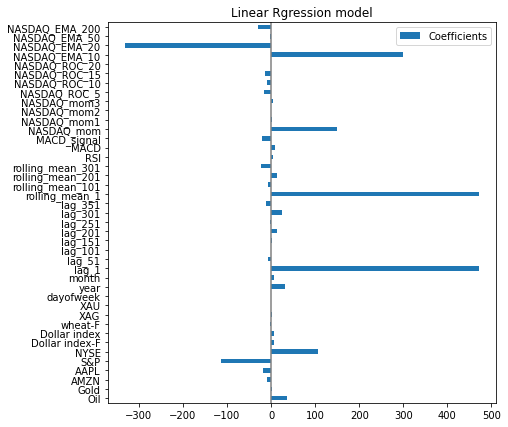

In [49]:
coefs = pd.DataFrame(
   model.coef_,
   columns=['Coefficients'], index=data.drop('Close',axis=1).columns
)
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Linear Rgression model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

lag_201              9.650057
rolling_mean_101     6.264234
NASDAQ_EMA_20       12.381457
dtype: float64


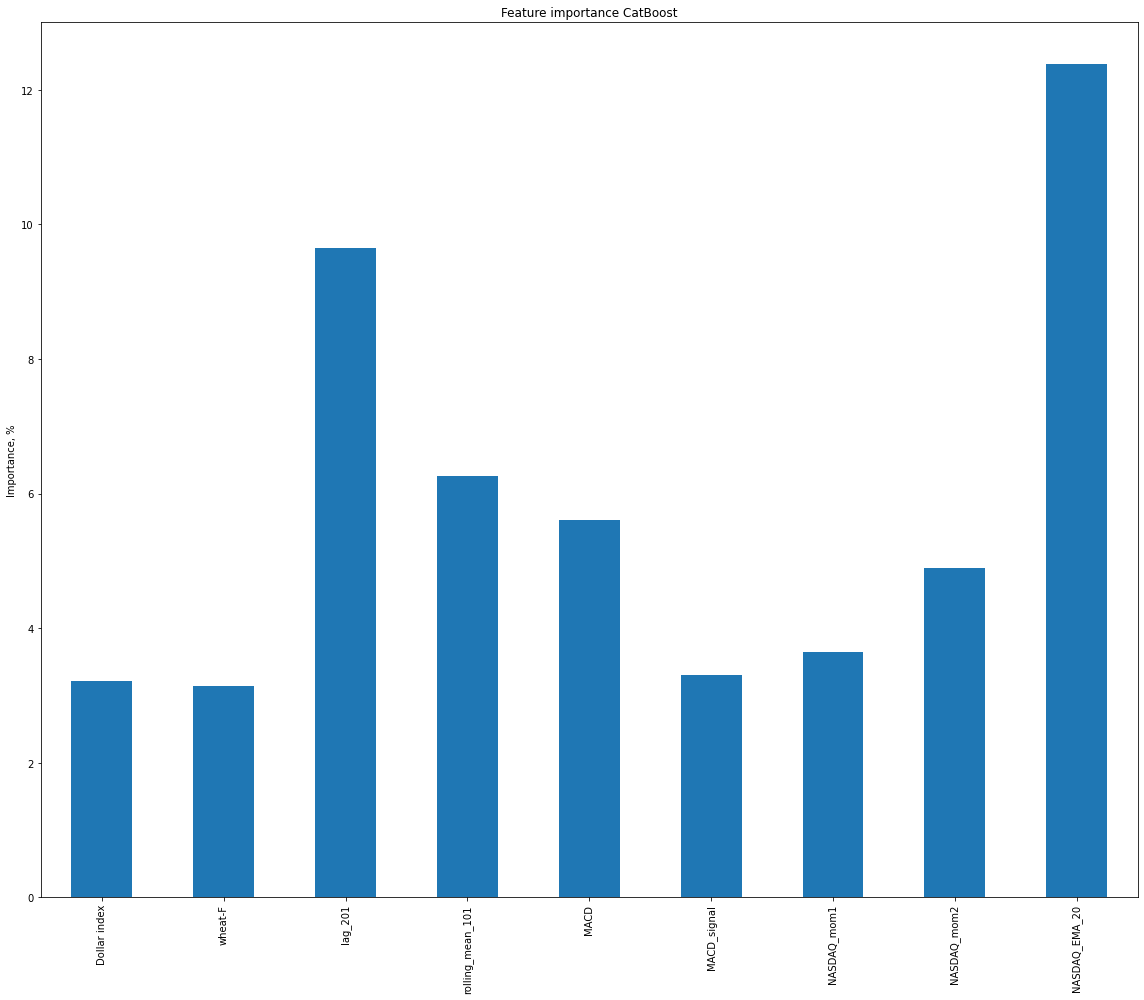

In [50]:
imp = pd.Series(model_cat.get_feature_importance(),
                         data.drop(['Close'], axis=1).columns)
print(imp[imp>6])
fig, ax = plt.subplots(figsize=(16,14))
(imp[imp>3]).plot.bar(ax=ax)
ax.set_title("Feature importance CatBoost")
ax.set_ylabel('Importance, %')
fig.tight_layout()

Experiment NYSE data

In [51]:
# def train_test_y_x_split(data): 
#   train, test = train_test_split(data, test_size=0.2, random_state=12345, shuffle=False)
#   train = train.dropna()

#   features_train = train.drop('Close', axis=1)
#   target_train = train['Close']
#   features_test = test.drop('Close', axis=1)
#   target_test = test['Close']
#   return train,test,features_train,target_train,features_test,target_test

In [52]:
data = nyse_data[['Close','Volume']]
make_features(data, 168, 168)
data = data.drop('Volume', axis=1)
data = data.fillna(0)
train,test,features_train,target_train,features_test,target_test = train_test_y_x_split(data)

<ipython-input-22-b70c7712e94e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c7712e94e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c7712e94e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c771

In [53]:
forest = RandomForestRegressor(max_depth=35, n_estimators=600, random_state=12345)
forest.fit(features_train, target_train)
y_pred = forest.predict(features_test)
r2,rmse,mape = metrics(forest,target_test,y_pred,features_test)
models_dict1['NYSE']['Random_forest']  = {'r2':r2,'rmse':rmse,'mape':mape}

R2 Score: 0.29727278012332425
RMSE: 523.0017104843703
MAPE: 0.030635753161380258


In [54]:
model_cat = CatBoostRegressor(depth=best_depth, learning_rate=best_learning_rate, l2_leaf_reg= best_l2, loss_function='MAPE',verbose=False)
model_cat.fit(features_train, target_train)
r2,rmse,mape = metrics(forest,target_test,y_pred,features_test)
models_dict1['NYSE']['CatBoost']  = {'r2':r2,'rmse':rmse,'mape':mape}

R2 Score: 0.29727278012332425
RMSE: 523.0017104843703
MAPE: 0.030635753161380258


In [55]:
model = LinearRegression()
model.fit(features_train,target_train)
y_pred = model.predict(features_test)
r2,rmse,mape = metrics(forest,target_test,y_pred,features_test)
models_dict1['NYSE']['Lin_Reg']  = {'r2':r2,'rmse':rmse,'mape':mape}

R2 Score: 0.9705680212297332
RMSE: 107.03343219075396
MAPE: 0.007636046736490621


Adding technical indicators from NASDAQ data to NYSE

In [56]:
for i in nasdaq_data.loc[:,'mom' : 'EMA_200']:
  data['NASDAQ_{}'.format(i)] = nasdaq_data[f'{i}']
data.fillna(0)
train,test,features_train,target_train,features_test,target_test = train_test_y_x_split(data)

In [57]:
forest = RandomForestRegressor(max_depth=35, n_estimators=600, random_state=12345)
forest.fit(features_train, target_train)
y_pred = forest.predict(features_test)
r2,rmse,mape = metrics(forest,target_test,y_pred,features_test)
models_dict1['NYSE+NASDAQ']['Random_forest']  = {'r2':r2,'rmse':rmse,'mape':mape}

R2 Score: 0.34267808468804073
RMSE: 505.8232378076902
MAPE: 0.028619259239060543


In [58]:
model_cat = CatBoostRegressor(depth=best_depth, learning_rate=best_learning_rate, l2_leaf_reg= best_l2, loss_function='MAPE',verbose=False)
model_cat.fit(features_train, target_train)
r2,rmse,mape = metrics(forest,target_test,y_pred,features_test)
models_dict1['NYSE+NASDAQ']['CatBoost']  = {'r2':r2,'rmse':rmse,'mape':mape}

R2 Score: 0.34267808468804073
RMSE: 505.8232378076902
MAPE: 0.028619259239060543


In [59]:
model = LinearRegression()
model.fit(features_train,target_train)
y_pred = model.predict(features_test)
r2,rmse,mape = metrics(forest,target_test,y_pred,features_test)
models_dict1['NYSE+NASDAQ']['Lin_Reg']  = {'r2':r2,'rmse':rmse,'mape':mape}

R2 Score: 0.9963198224299045
RMSE: 37.84810224074725
MAPE: 0.0025153231677200647


Adding SP features

In [60]:
for i in sp_data.loc[:,'mom' : 'EMA_200']:
  data['SP_{}'.format(i)] = sp_data[f'{i}']
data.fillna(0)
train,test,features_train,target_train,features_test,target_test = train_test_y_x_split(data)

In [61]:
forest = RandomForestRegressor(max_depth=35, n_estimators=600, random_state=12345)
forest.fit(features_train, target_train)
y_pred = forest.predict(features_test)
r2,rmse,mape = metrics(forest,target_test,y_pred,features_test)
models_dict1['NYSE+NASDAQ+SP']['Random_forest']  = {'r2':r2,'rmse':rmse,'mape':mape}

R2 Score: 0.3530322140916363
RMSE: 501.82356283541714
MAPE: 0.027984487925024015


In [62]:
model = LinearRegression()
model.fit(features_train,target_train)
y_pred = model.predict(features_test)
r2,rmse,mape = metrics(forest,target_test,y_pred,features_test)
models_dict1['NYSE+NASDAQ+SP']['Lin_Reg']  = {'r2':r2,'rmse':rmse,'mape':mape}

R2 Score: 0.9987887568080436
RMSE: 21.71327814640835
MAPE: 0.0014618249799616615


In [63]:
model_cat = CatBoostRegressor(depth=best_depth, learning_rate=best_learning_rate, l2_leaf_reg= best_l2, loss_function='MAPE',verbose=False)
model_cat.fit(features_train, target_train)
r2,rmse,mape = metrics(forest,target_test,y_pred,features_test)
models_dict1['NYSE+NASDAQ+SP']['CatBoost']  = {'r2':r2,'rmse':rmse,'mape':mape}

R2 Score: 0.9987887568080436
RMSE: 21.71327814640835
MAPE: 0.0014618249799616615


In [64]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=test.index, y=y_pred, name='Pred'))
fig.add_trace(go.Scatter(x=test.index,  y=target_test,  name='Target'))
fig.show()

Adding Russel features

In [65]:
# for i in sp_data.loc[:,'mom' : 'EMA_200']:
#   data['RUSSELL_{}'.format(i)] = russell_data[f'{i}']
# data.fillna(0)
# train,test,features_train,target_train,features_test,target_test = train_test_y_x_split(data)

In [66]:
# forest = RandomForestRegressor(max_depth=35, n_estimators=600, random_state=12345)
# forest.fit(features_train, target_train)
# y_pred = forest.predict(features_test)
# r2,rmse,mape = metrics(forest,target_test,y_pred,features_test)
# models_dict1['NYSE+NASDAQ+SP+RUSSELL']['Random_forest']  = {'r2':r2,'rmse':rmse,'mape':mape}

In [67]:
# model_cat = CatBoostRegressor(depth=best_depth, learning_rate=best_learning_rate, l2_leaf_reg= best_l2, loss_function='MAPE',verbose=False)
# model_cat.fit(features_train, target_train)
# r2,rmse,mape = metrics(forest,target_test,y_pred,features_test)
# models_dict1['NYSE+NASDAQ+SP+RUSSELL']['CatBoost']  = {'r2':r2,'rmse':rmse,'mape':mape}

In [68]:
# model = LinearRegression()
# model.fit(features_train,target_train)
# y_pred = model.predict(features_test)
# r2,rmse,mape = metrics(forest,target_test,y_pred,features_test)
# models_dict1['NYSE+NASDAQ+SP+RUSSELL']['Lin_Reg']  = {'r2':r2,'rmse':rmse,'mape':mape}

In [69]:
# import plotly.express as px
# import plotly.graph_objects as go
# def make_plot(model_dict,key_metric):
#
#   names= list(model_dict.keys())
#   catboost_list = []
#   rf_list = []
#   lr_list = []
#   text_catboost = []
#   text_rf = []
#   text_lr = []
#   a = 0
#   for key,value in model_dict.items():
#     catboost_list.append(model_dict[key]['CatBoost'][key_metric])
#     text_catboost.append(model_dict[key]['CatBoost'][key_metric]-a)
#     a = model_dict[key]['CatBoost'][key_metric]
#   a = 0
#   for key,value in model_dict.items():
#     rf_list.append(model_dict[key]['Random_forest'][key_metric])
#     text_rf.append(model_dict[key]['Random_forest'][key_metric]-a)
#     a = model_dict[key]['Random_forest'][key_metric]
#   a = 0
#   for key,value in model_dict.items():
#     lr_list.append(model_dict[key]['Lin_Reg'][key_metric])
#     text_lr.append(model_dict[key]['Lin_Reg'][key_metric]-a)
#     a = model_dict[key]['Lin_Reg'][key_metric]
#
#
#   text_catboost[0] = ''
#   text_rf[0] = ''
#   text_lr[0] = ''
#   title = f'Metric {key_metric}'
#   fig = go.Figure(data=[
#       go.Bar(name='CatBoost', x=names, y=catboost_list ,text = text_catboost),
#       go.Bar(name='RandomForestRegressor', x=names, y=rf_list,text=text_rf,
#               textposition='auto'),
#       go.Bar(name='LinearRegression', x=names, y=lr_list,text=text_lr)
#   ])
#   fig.update_layout(
#     title=title)
#   fig.update_traces( textposition='outside', textfont=dict(
#           family="sans serif",
#           size=18,
#           color="LightSeaGreen"
#       ))
#   # Change the bar mode
#   fig.update_layout(barmode='group')
#   fig.show()

In [70]:
# metric_list =['r2','rmse','mape']
# for m in metric_list:
#   make_plot(models_dict,m)
# for m in metric_list:
#   make_plot(models_dict1,m)

Consclusion:
As we can see, technical indicators of other indices can improve the training of the model to predict the closing price of a fixed index.


*   **RUSSELL**

Random Forest:
R2 Score: 0.03417320297979998

RMSE: 107.57240972939978

MAPE: 0.06157130302296962

CatBoost:

R2 Score: -0.8827369414375956

RMSE: 150.19175565817844

MAPE: 0.08496575553080626

LinearRegression:

R2 Score: 0.9790727863341891

RMSE: 15.834595592573383

MAPE: 0.009264408930424524

*   **RUSSEL + NASDAQ**

  Random Forest:

  R2 Score: 0.04041339319062465

  RMSE: 107.2243348536412
  
  MAPE: 0.06083165847721684


  CatBoost:

  R2 Score: -0.7382589495531213

  RMSE: 144.31401483730306

  MAPE: 0.08368217865876457

  LinearRegression:

  R2 Score: 0.9843896559770323

  RMSE: 13.675950149420606

  MAPE: 0.007982980960402024

*   **NYSE**

  Random Forest:

  R2 Score: 0.3086830385310504

  RMSE: 518.7383154865414

  MAPE: 0.030488907337964163

  CatBoost:

  R2 Score: 0.3086830385310504

  RMSE: 518.7383154865414

  MAPE: 0.030488907337964163

  LinearRegression:

  R2 Score: 0.9628437759304348

  RMSE: 120.26119300830483

  MAPE: 0.008866951261983277

*   **NYSE + NASDAQ**

  Random Forest:

  R2 Score: 0.3372160372725611

  RMSE: 507.92047106587785

  MAPE: 0.028791661688234296

  CatBoost:

  R2 Score: 0.3372160372725611

  RMSE: 507.92047106587785

  MAPE: 0.028791661688234296

  LinearRegression:

  R2 Score: 0.99629119358856

  RMSE: 37.995031046136006

  MAPE: 0.0025331087525435696

*   **NYSE + NASDAQ + SP**

  Random Forest:

  R2 Score: 0.34821349229419163

  RMSE: 503.6889278453763

  MAPE: 0.028165285453521323


*   **NYSE + NASDAQ + SP + RUSSELL**

  Random Forest:

  R2 Score: 0.3401371103639875

  RMSE: 506.799961777731

  MAPE: 0.028495452885232943




Feature importance: Shap

In [71]:
# import shap
#
# shap_test = shap.TreeExplainer(forest).shap_values(data)
# shap.summary_plot(shap_test, data,
#                       max_display=25, auto_size_plot=True)

In [72]:
residuals = abs(y_pred - target_test)

# Extract the most wrong prediction
wrong = features_test[np.argmax(residuals), :]

right = features_test[np.argmin(residuals), :]

print('Prediction: %0.4f' % np.argmax(residuals))
print('Actual Value: %0.4f' % target_test[np.argmax(residuals)])

Prediction: 44.0000
Actual Value: 10183.5098


Wrong case

In [73]:
# import lime
# from lime import lime_tabular
#
# feature_list = list(data.drop('Close',axis=1).columns)
# # Create a lime explainer object
# explainer = lime.lime_tabular.LimeTabularExplainer(training_data = features_train, mode = 'regression', training_labels = target_train, feature_names = feature_list)
#
#
# # Explanation for wrong prediction
# exp = explainer.explain_instance(data_row = wrong, predict_fn = model.predict)
#
# # Plot the prediction explaination
# exp.as_pyplot_figure();

In [74]:
# exp.show_in_notebook()
# print('             ')

Right case

In [75]:
# feature_list = list(data.drop('Close',axis=1).columns)
# explainer = lime.lime_tabular.LimeTabularExplainer(training_data = features_train, mode = 'regression', training_labels = target_train, feature_names = feature_list)
# exp = explainer.explain_instance(data_row = right, predict_fn = model.predict)
# exp.as_pyplot_figure();

In [76]:
# exp.show_in_notebook()

LSTM

In [77]:
def train_test_split_lstm(feature, test_size, window):
    np.random.seed(12345)
    close_prices = feature
    values = close_prices.values
    training_data_len = math.ceil(len(values) * (1 - test_size))
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(values.reshape(-1, 1))
    train_data = scaled_data[0: training_data_len, :]
    x_train = []
    y_train = []
    for i in range(window, len(train_data)):
        x_train.append(train_data[i - window:i])
        y_train.append(train_data[i])
    x_train, y_train = np.array(x_train), np.array(y_train)
    test_data = scaled_data[training_data_len - window:]
    x_test = []
    y_test = values[training_data_len:]
    for i in range(window, len(test_data)):
        x_test.append(test_data[i - window:i, 0])
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  #TODO способ подачи
    return scaler, x_test, x_train, y_test, y_train

In [78]:
def fit_actions(x_train, y_train, n_features=1):
    np.random.seed(12345)
    model = keras.Sequential()
    model.add(layers.LSTM(100, return_sequences=False, input_shape=(x_train.shape[1], n_features)))

    model.add(layers.Dense(1))
    model.summary()
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=15, epochs=100, verbose=False)
    return model

In [79]:
np.random.seed(12345)
scaler_per_day, x_test_per_day, x_train_per_day, y_test_per_day, y_train_per_day = train_test_split_lstm(
    data['Close'],
    window=60,
    test_size=0.2)
model_per_day = fit_actions(x_train_per_day, y_train_per_day)
predictions_per_day = model_per_day.predict(x_test_per_day)
predictions_per_day = scaler_per_day.inverse_transform(predictions_per_day)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
13/13 [==============================] - 1s 16ms/step


In [80]:
print('R2 Score:', r2_score(y_true=y_test_per_day, y_pred=predictions_per_day))
print('RMSE:', mean_squared_error(y_true=y_test_per_day, y_pred=predictions_per_day, squared=False))
print('MAPE:', mean_absolute_percentage_error(y_true=y_test_per_day, y_pred=predictions_per_day))

R2 Score: 0.9691612627891076
RMSE: 109.50138118978295
MAPE: 0.0084238534757486


In [81]:
# fig = go.Figure(data=[
#       go.Bar(name='R2', x=['LinearRegression','LSTM'], y=[models_dict1['NYSE+NASDAQ+SP']['Lin_Reg']['r2'],0.9889503233167248],text=[models_dict1['NYSE+NASDAQ+SP']['Lin_Reg']['r2'],0.9889503233167248])
#   ])
# fig.update_layout(
# title='R2')
# fig.update_traces( textposition='inside', textfont=dict(
#           family="sans serif",
#           size=24,
#           color="Black"
# ))
# # Change the bar mode
# fig.update_layout(barmode='group',width = 1000)
# fig.show()

In [82]:
# fig = go.Figure(data=[
#       go.Bar(name='R2', x=['LinearRegression','LSTM'], y=[models_dict1['NYSE+NASDAQ+SP']['Lin_Reg']['rmse'],65.54598426326037],text=[models_dict1['NYSE+NASDAQ+SP']['Lin_Reg']['r2'],65.54598426326037])
#   ])
# fig.update_layout(
# title='RMSE')
# fig.update_traces( textposition='inside', textfont=dict(
#           family="sans serif",
#           size=24,
#           color="Black"
# ))
# # Change the bar mode
# fig.update_layout(barmode='group',width = 1000)
# fig.show()

In [83]:
# fig = go.Figure(data=[
#       go.Bar(name='R2', x=['LinearRegression','LSTM'], y=[models_dict1['NYSE+NASDAQ+SP']['Lin_Reg']['mape'], 0.004222103748924754],text=[models_dict1['NYSE+NASDAQ+SP']['Lin_Reg']['mape'], 0.004222103748924754])
#   ])
# fig.update_layout(
# title='MAPE')
# fig.update_traces( textposition='inside', textfont=dict(
#           family="sans serif",
#           size=24,
#           color="Black"
# ))
# # Change the bar mode
# fig.update_layout(barmode='group',width = 1000)
# fig.show()

## The study of the greatest impact taking into account the specifics of the activity

In [84]:
metrics_specifics = {}
metrics_specifics['NASDAQ'] = {}
metrics_specifics['NYSE'] = {}
metrics_specifics['RUSSELL'] = {}
metrics_specifics['DJI'] = {}
metrics_specifics['SP'] = {}

## Prediction of the target feature of the NYSE index

### NYSE+RUSSELL

In [85]:
data = nyse_data[['Close','Volume']]
make_features(data, 168, 168)
data = data.drop('Volume', axis=1)
data = data.fillna(0)



<ipython-input-22-b70c7712e94e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c7712e94e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c7712e94e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c771

In [86]:
for i in russell_data.loc[:,'mom' : 'EMA_200']:
  data['RUSSELL_{}'.format(i)] = russell_data[f'{i}']
data.fillna(0)
train,test,features_train,target_train,features_test,target_test = train_test_y_x_split(data)

In [87]:
model = LinearRegression()
model.fit(features_train,target_train)
y_pred = model.predict(features_test)

r2 =  r2_score(target_test,y_pred)
rmse = mean_squared_error(y_true=target_test, y_pred=y_pred, squared=False)
mape =  mean_absolute_percentage_error(y_true=target_test, y_pred=y_pred)
print('R2 Score:',r2)
print('RMSE:',rmse)
print('MAPE:', mape)
metrics_specifics['NYSE']['NYSE+RUSSELL'] = [r2,rmse,mape]

R2 Score: 0.9970955342906868
RMSE: 33.623494509212314
MAPE: 0.0021947978743576315


### NYSE+SP

In [88]:
data = nyse_data[['Close','Volume']]
make_features(data, 168, 168)
data = data.drop('Volume', axis=1)
data = data.fillna(0)


<ipython-input-22-b70c7712e94e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c7712e94e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c7712e94e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c771

In [89]:
for i in sp_data.loc[:,'mom' : 'EMA_200']:
    data['SP_{}'.format(i)] = sp_data[f'{i}']
data.fillna(0)
train,test,features_train,target_train,features_test,target_test = train_test_y_x_split(data)

In [90]:
model = LinearRegression()
model.fit(features_train,target_train)
y_pred = model.predict(features_test)
r2,rmse,mape = metrics(forest,target_test,y_pred,features_test)
metrics_specifics['NYSE']['NYSE+SP'] = [r2,rmse,mape]

R2 Score: 0.9986088671164487
RMSE: 23.269873880352105
MAPE: 0.0015810153159221728


### NYSE+NASDAQ

In [91]:
data = nyse_data[['Close','Volume']]
make_features(data, 168, 168)
data = data.drop('Volume', axis=1)
data = data.fillna(0)


<ipython-input-22-b70c7712e94e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c7712e94e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c7712e94e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c771

In [92]:
for i in nasdaq_data.loc[:,'mom' : 'EMA_200']:
    data['NASDAQ_{}'.format(i)] = nasdaq_data[f'{i}']
data.fillna(0)
train,test,features_train,target_train,features_test,target_test = train_test_y_x_split(data)

In [93]:
model = LinearRegression()
model.fit(features_train,target_train)
y_pred = model.predict(features_test)
r2,rmse,mape = metrics(forest,target_test,y_pred,features_test)
metrics_specifics['NYSE']['NYSE+NASDAQ'] = [r2,rmse,mape]

R2 Score: 0.9963198224299045
RMSE: 37.84810224074725
MAPE: 0.0025153231677200647


## Prediction of the target feature of the RUSSELL index

### RUSSELL+SP

In [94]:
data = russell_data[['Close','Volume']]
make_features(data, 168, 168)
data = data.drop('Volume', axis=1)
data = data.fillna(0)



<ipython-input-22-b70c7712e94e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c7712e94e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c7712e94e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c771

In [95]:
for i in sp_data.loc[:,'mom' : 'EMA_200']:
  data['SP_{}'.format(i)] = sp_data[f'{i}']
data.fillna(0)
train,test,features_train,target_train,features_test,target_test = train_test_y_x_split(data)

In [96]:
model = LinearRegression()
model.fit(features_train,target_train)
y_pred = model.predict(features_test)

r2 =  r2_score(target_test,y_pred)
rmse = mean_squared_error(y_true=target_test, y_pred=y_pred, squared=False)
mape =  mean_absolute_percentage_error(y_true=target_test, y_pred=y_pred)
print('R2 Score:',r2)
print('RMSE:',rmse)
print('MAPE:', mape)
metrics_specifics['RUSSELL']['RUSSELL+SP'] = [r2,rmse,mape]

R2 Score: 0.9957765387264892
RMSE: 7.2285424911534095
MAPE: 0.004169910017607399


### RUSSELL+NYSE

In [97]:
data = russell_data[['Close','Volume']]
make_features(data, 168, 168)
data = data.drop('Volume', axis=1)
data = data.fillna(0)



<ipython-input-22-b70c7712e94e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c7712e94e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c7712e94e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c771

In [98]:
for i in nyse_data.loc[:,'mom' : 'EMA_200']:
  data['NYSE_{}'.format(i)] = nyse_data[f'{i}']
data.fillna(0)
train,test,features_train,target_train,features_test,target_test = train_test_y_x_split(data)

In [99]:
model = LinearRegression()
model.fit(features_train,target_train)
y_pred = model.predict(features_test)

r2 =  r2_score(target_test,y_pred)
rmse = mean_squared_error(y_true=target_test, y_pred=y_pred, squared=False)
mape =  mean_absolute_percentage_error(y_true=target_test, y_pred=y_pred)
print('R2 Score:',r2)
print('RMSE:',rmse)
print('MAPE:', mape)
metrics_specifics['RUSSELL']['RUSSELL+NYSE'] = [r2,rmse,mape]

R2 Score: 0.9958183606279583
RMSE: 7.192663919786935
MAPE: 0.004146853220608899


### RUSSELL+NASDAQ

In [100]:
data = russell_data[['Close','Volume']]
make_features(data, 168, 168)
data = data.drop('Volume', axis=1)
data = data.fillna(0)



<ipython-input-22-b70c7712e94e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c7712e94e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c7712e94e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c771

In [101]:
for i in nasdaq_data.loc[:,'mom' : 'EMA_200']:
  data['NASDAQ_{}'.format(i)] = nasdaq_data[f'{i}']
data.fillna(0)
train,test,features_train,target_train,features_test,target_test = train_test_y_x_split(data)

In [102]:
model = LinearRegression()
model.fit(features_train,target_train)
y_pred = model.predict(features_test)

r2 =  r2_score(target_test,y_pred)
rmse = mean_squared_error(y_true=target_test, y_pred=y_pred, squared=False)
mape =  mean_absolute_percentage_error(y_true=target_test, y_pred=y_pred)
print('R2 Score:',r2)
print('RMSE:',rmse)
print('MAPE:', mape)
metrics_specifics['RUSSELL']['RUSSELL+NASDAQ'] = [r2,rmse,mape]

R2 Score: 0.9957008271493346
RMSE: 7.293045672869831
MAPE: 0.004284963612755616


## Prediction of the target feature of the Daw Jones index

### DJI+SP

In [103]:
data = dji_data[['Close','Volume']]
make_features(data, 168, 168)
data = data.drop('Volume', axis=1)
data = data.fillna(0)



<ipython-input-22-b70c7712e94e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c7712e94e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c7712e94e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c771

In [104]:
for i in sp_data.loc[:,'mom' : 'EMA_200']:
  data['SP_{}'.format(i)] = sp_data[f'{i}']
data.fillna(0)
train,test,features_train,target_train,features_test,target_test = train_test_y_x_split(data)

In [105]:
model = LinearRegression()
model.fit(features_train,target_train)
y_pred = model.predict(features_test)

r2 =  r2_score(target_test,y_pred)
rmse = mean_squared_error(y_true=target_test, y_pred=y_pred, squared=False)
mape =  mean_absolute_percentage_error(y_true=target_test, y_pred=y_pred)
print('R2 Score:',r2)
print('RMSE:',rmse)
print('MAPE:', mape)
metrics_specifics['DJI']['DJI+SP'] = [r2,rmse,mape]

R2 Score: 0.9991355753847319
RMSE: 50.88575050675051
MAPE: 0.0019003895720365771


### DJI+NYSE

In [106]:
data = dji_data[['Close','Volume']]
make_features(data, 168, 168)
data = data.drop('Volume', axis=1)
data = data.fillna(0)



<ipython-input-22-b70c7712e94e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c7712e94e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c7712e94e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c771

In [107]:
for i in nyse_data.loc[:,'mom' : 'EMA_200']:
  data['NYSE_{}'.format(i)] = nyse_data[f'{i}']
data.fillna(0)
train,test,features_train,target_train,features_test,target_test = train_test_y_x_split(data)

In [108]:
model = LinearRegression()
model.fit(features_train,target_train)
y_pred = model.predict(features_test)

r2 =  r2_score(target_test,y_pred)
rmse = mean_squared_error(y_true=target_test, y_pred=y_pred, squared=False)
mape =  mean_absolute_percentage_error(y_true=target_test, y_pred=y_pred)
print('R2 Score:',r2)
print('RMSE:',rmse)
print('MAPE:', mape)
metrics_specifics['DJI']['DJI+NYSE'] = [r2,rmse,mape]

R2 Score: 0.9988499097916147
RMSE: 58.694657749859935
MAPE: 0.0022303606464332956


### DJI+NASDAQ

In [109]:
data = dji_data[['Close','Volume']]
make_features(data, 168, 168)
data = data.drop('Volume', axis=1)
data = data.fillna(0)



<ipython-input-22-b70c7712e94e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c7712e94e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c7712e94e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c771

In [110]:
for i in nasdaq_data.loc[:,'mom' : 'EMA_200']:
  data['NASDAQ_{}'.format(i)] = nasdaq_data[f'{i}']
data.fillna(0)
train,test,features_train,target_train,features_test,target_test = train_test_y_x_split(data)

In [111]:
model = LinearRegression()
model.fit(features_train,target_train)
y_pred = model.predict(features_test)

r2 =  r2_score(target_test,y_pred)
rmse = mean_squared_error(y_true=target_test, y_pred=y_pred, squared=False)
mape =  mean_absolute_percentage_error(y_true=target_test, y_pred=y_pred)
print('R2 Score:',r2)
print('RMSE:',rmse)
print('MAPE:', mape)
metrics_specifics['DJI']['DJI+NASDAQ'] = [r2,rmse,mape]

R2 Score: 0.9986752684698504
RMSE: 62.99361882128709
MAPE: 0.0023646235359890064


## Predicting Close price EuroStoxx

In [112]:
data = eurostoxx_data[['Close','Volume']]
make_features(data, 168, 168)
data = data.drop('Volume', axis=1)
data = data.fillna(0)
train,test,features_train,target_train,features_test,target_test = train_test_y_x_split(data)


<ipython-input-22-b70c7712e94e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c7712e94e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-b70c7712e94e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [113]:
model = LinearRegression()
model.fit(features_train,target_train)
y_pred = model.predict(features_test)

r2 =  r2_score(target_test,y_pred)
rmse = mean_squared_error(y_true=target_test, y_pred=y_pred, squared=False)
mape =  mean_absolute_percentage_error(y_true=target_test, y_pred=y_pred)
print('R2 Score:',r2)
print('RMSE:',rmse)
print('MAPE:', mape)
metrics_specifics['DJI']['DJI+SP'] = [r2,rmse,mape]

R2 Score: 0.5719351530145729
RMSE: 0.07700337225209368
MAPE: 0.024276751384211467


### Euro Stoxx 50+SMI

## Results

In [114]:
import plotly.express as px
import plotly.graph_objects as go
def make_plot(model_dict,key_metric):

  names= list(model_dict.keys())
  catboost_list = []
  rf_list = []
  lr_list = []
  text_catboost = []
  text_rf = []
  text_lr = []
  a = 0
  for key,value in model_dict.items():
    lr_list.append(model_dict[key][key_metric])
    text_lr.append(model_dict[key][key_metric]-a)
    a = model_dict[key][key_metric]


  
  text_lr[0] = ''
  if key_metric==0:
    key_metric = 'r2'
  if key_metric==1:
    key_metric = 'rmse'
  if key_metric == 2:
    key_metric = 'mape'
  title = f'Metric {key_metric}'
  fig = go.Figure(data=[
      go.Bar(name='LinearRegression', x=names, y=lr_list,text=text_lr)
  ])
  fig.update_layout(
    title=title)
  fig.update_traces( textposition='outside', textfont=dict(
          family="sans serif",
          size=18,
          color="LightSeaGreen"
      ))
  # Change the bar mode
  fig.update_layout(barmode='group')
  fig.show()

In [115]:
metric_list =['r2','rmse','mape']
list_data = ['NYSE','RUSSELL','DJI']
print(metrics_specifics['NYSE'])
for m in range(3):
  for key in list_data:
    make_plot(metrics_specifics[key],m)

{'NYSE+RUSSELL': [0.9970955342906868, 33.623494509212314, 0.0021947978743576315], 'NYSE+SP': [0.9986088671164487, 23.269873880352105, 0.0015810153159221728], 'NYSE+NASDAQ': [0.9963198224299045, 37.84810224074725, 0.0025153231677200647]}


## Temporal fusion **transformer**

In [116]:
import os
import warnings

warnings.filterwarnings("ignore")  # avoid printing out absolute paths

os.chdir("../../..")


import copy
from pathlib import Path
import warnings

import numpy as np
import pandas as pd
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_lightning.loggers import TensorBoardLogger
import torch

from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters
from darts.models import TFTModel, NaiveSeasonal, NaiveDrift, ExponentialSmoothing
from darts import TimeSeries, concatenate
from darts.dataprocessing.transformers import Scaler
from darts.models import TFTModel, NaiveSeasonal, NaiveDrift, ExponentialSmoothing
from darts.utils.statistics import check_seasonality, extract_trend_and_seasonality
from darts.metrics import mape
from darts.datasets import AirPassengersDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.utils.likelihood_models import QuantileRegression
from darts.utils.utils import ModelMode, SeasonalityMode, TrendMode

In [117]:
data = russell_data[['Close']]

data = data.asfreq('D')
data = data[['Close']].interpolate(method='linear')

data = TimeSeries.from_dataframe(data)
#data.plot()

In [118]:
# Read data

data = russell_data[['Close']]

data = data.asfreq('D')
data = data[['Close']].interpolate(method='linear')

data = TimeSeries.from_dataframe(data)

# Create training and validation sets:
training_cutoff = pd.Timestamp("20170501")
train, val = data.split_after(training_cutoff)

# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(data)

# create year, month and integer index covariate series
covariates = datetime_attribute_timeseries(data, attribute="year", one_hot=False)
covariates = covariates.stack(
    datetime_attribute_timeseries(data, attribute="month", one_hot=False)
)
covariates = covariates.stack(
    TimeSeries.from_times_and_values(
        times=data.time_index,
        values=np.arange(len(data)),
        columns=["linear_increase"],
    )
)
covariates = covariates.astype(np.float32)

# transform covariates (note: we fit the transformer on train split and can then transform the entire covariates series)
scaler_covs = Scaler()
cov_train, cov_val = covariates.split_after(training_cutoff)
scaler_covs.fit(cov_train)
covariates_transformed = scaler_covs.transform(covariates)

In [119]:
EPOCHS = 200
INLEN = 20
HIDDEN = 4
LSTMLAYERS = 2
ATTHEADS = 1
DROPOUT = 0.1
BATCH = 32

N_FC = 36           # default forecast horizon
RAND = 42           # set random state
N_SAMPLES = 100     # number of times a prediction is sampled from a probabilistic model
N_JOBS = -1          # parallel processors to use;  -1 = all processors

QUANTILES = [0.01, 0.05, 0.1, 0.2, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99]

model = TFTModel(   input_chunk_length=INLEN,
                    output_chunk_length=N_FC,
                    hidden_size=HIDDEN,
                    lstm_layers=LSTMLAYERS,
                    num_attention_heads=ATTHEADS,
                    dropout=DROPOUT,
                    batch_size=BATCH,
                    n_epochs=EPOCHS,
                    likelihood=QuantileRegression(quantiles=QUANTILES), 
                    # loss_fn=MSELoss(),
                    random_state=RAND, 
                    force_reset=True)
                    
                    
model.fit(train_transformed, future_covariates=covariates_transformed, verbose=True)



INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                              | Type                             | Params
----------------------------------------------------------------------------------------
0  | train_metrics                     | MetricCollection                 | 0     
1  | val_metrics                       | MetricCollection                 | 0     
2  | input_embeddings                  | _MultiEmbedding                  | 0     
3  | static_covariates_vsn             | _VariableSelectionNetwork        | 0     
4  | encoder_vsn                       | _VariableSelectionNetwork        | 756   
5  | decoder_vsn                       | _Vari

Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

<TimeSeries (DataArray) (Date: 50, component: 1, sample: 100)>
array([[[0.99842791, 0.97315458, 0.9344117 , ..., 0.93493427,
         0.90271419, 0.96093647]],

       [[0.98751641, 0.95748339, 0.9606469 , ..., 1.00401429,
         0.98059786, 0.9932334 ]],

       [[0.93512422, 0.99470442, 1.003434  , ..., 0.95332142,
         0.94601368, 0.93690154]],

       ...,

       [[0.98218983, 0.95052423, 1.01248472, ..., 0.97844475,
         1.00117779, 0.97381527]],

       [[0.96578786, 0.99166452, 0.95050358, ..., 1.00782488,
         1.01968294, 1.00081442]],

       [[1.00061096, 0.96502269, 1.01192911, ..., 1.00237043,
         0.96942709, 0.95060063]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2017-05-02 2017-05-03 ... 2017-06-20
  * component  (component) object 'Close'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
MAPE: 1.516079510446604


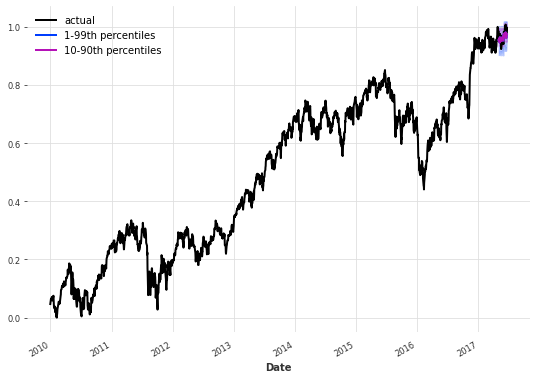

In [120]:
num_samples = 200

figsize = (9, 6)
lowest_q, low_q, high_q, highest_q = 0.01, 0.1, 0.9, 0.99
label_q_outer = f"{int(lowest_q * 100)}-{int(highest_q * 100)}th percentiles"
label_q_inner = f"{int(low_q * 100)}-{int(high_q * 100)}th percentiles"

def eval_model(model, n, actual_series, val_series):
    pred_series = model.predict(n=n, num_samples=100)
    print(pred_series)

    plt.figure(figsize=figsize)
    actual_series[: pred_series.end_time()].plot(label="actual")

    #plot prediction with quantile ranges
    pred_series.plot(
        low_quantile=lowest_q, high_quantile=highest_q, label=label_q_outer
    )
    pred_series.plot(low_quantile=low_q, high_quantile=high_q, label=label_q_inner)

    # r2 =  r2_score(val_series,pred_series)
    # rmse = mean_squared_error(y_true=val_series, y_pred=pred_series, squared=False)
    # print('R2 Score:',r2)
    # print('RMSE:',rmse)
    print('MAPE:', mape(val_series, pred_series))
    


eval_model(model, 50, series_transformed, val_transformed)

In [14]:
# Standard python libraries
import os
import time

# Essential DS libraries
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, mean_squared_log_error
from sklearn.model_selection import train_test_split
import torch

# LightAutoML presets, task and report generation
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
from lightautoml.report.report_deco import ReportDeco

In [4]:
N_THREADS = 4
N_FOLDS = 5
RANDOM_STATE = 42
TEST_SIZE = 0.2
TIMEOUT = 300
TARGET_NAME = 'TARGET'

In [5]:
np.random.seed(RANDOM_STATE)
torch.set_num_threads(N_THREADS)

Create task

In [6]:
%%time

task = Task('reg', loss = 'rmsle', metric = 'rmsle')

CPU times: user 2.21 ms, sys: 20 µs, total: 2.23 ms
Wall time: 5.77 ms


Setup columns roles

In [7]:
%%time

roles = {
    'target': 'Close',
    'drop': ['Id'],
}

CPU times: user 33 µs, sys: 0 ns, total: 33 µs
Wall time: 38.9 µs


In [26]:
data = nyse_data[['Close']]
data = data.asfreq('D')
data = data[['Close']].interpolate(method='linear')
make_features(data, 168, 168)
tr_data, te_data = train_test_split(data, 
                                     test_size=TEST_SIZE,
                                     random_state=RANDOM_STATE,
                                    shuffle=False)

In [27]:
%%time 

cnt_trained = 0
results = []
rs_list = list(range(2000, 2005))
for it, rs in enumerate(rs_list):
    print('=' * 30)
    print('START RANDOM_STATE = {}'.format(rs))
    print('=' * 30)
    
    # Train AutoML
    automl = TabularAutoML(task = task, 
                       timeout = TIMEOUT,
                       cpu_limit = N_THREADS,
                       reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': rs})
    oof_pred = automl.fit_predict(tr_data, roles = roles)
    
    # Predict on test
    test_pred = automl.predict(te_data)
    cnt_trained += 1
    
    # Save predictions
    if it == 0:
        oof_pred_full = oof_pred.data[:, 0].copy()
        test_pred_full = test_pred.data[:, 0].copy()
    else:
        oof_pred_full += oof_pred.data[:, 0]
        test_pred_full += test_pred.data[:, 0]
    
    # Check scores for current predict and aggregated one
    rmsle_usual = mean_squared_log_error(te_data['Close'].values, test_pred.data[:, 0]) ** 0.5
    rmsle_full = mean_squared_log_error(te_data['Close'].values, test_pred_full / cnt_trained) ** 0.5
    results.append((rmsle_usual, rmsle_full, rmsle_full - rmsle_usual))
    
    print('Check scores...')
    print('Holdout score: {}'.format(rmsle_usual))
    print('Holdout score full: {}'.format(rmsle_full))
    print('Difference: {}'.format(rmsle_full - rmsle_usual))

INFO:lightautoml.automl.presets.base:Stdout logging level is ERROR.
INFO:lightautoml.automl.presets.base:Task: reg

INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:
INFO:lightautoml.automl.presets.base:- time: 300.00 seconds
INFO:lightautoml.automl.presets.base:- CPU: 4 cores
INFO:lightautoml.automl.presets.base:- memory: 16 GB

INFO:lightautoml.reader.base:Train data shape: (2301, 10)



START RANDOM_STATE = 2000


INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []
INFO:lightautoml.automl.base:Layer 1 train process start. Time left 294.99 secs
INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [], 'embed_sizes': (), 'data_size': 13}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1e-05 score = -0.15777089856243387
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5e-05 score = -0.15777089856243387
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.0001 score = -0.15777089856243387
INFO2:lightautoml.ml_algo.base:===== Start working with 

Check scores...
Holdout score: 0.05724414276735293
Holdout score full: 0.05724414276735293
Difference: 0.0
START RANDOM_STATE = 2001


INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []
INFO:lightautoml.automl.base:Layer 1 train process start. Time left 299.70 secs
INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [], 'embed_sizes': (), 'data_size': 13}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1e-05 score = -0.16188438878483913
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5e-05 score = -0.16188438878483913
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.0001 score = -0.16188438878483913
INFO2:lightautoml.ml_algo.base:===== Start working with 

Check scores...
Holdout score: 0.05808731807818571
Holdout score full: 0.057663514974625074
Difference: -0.00042380310356063267
START RANDOM_STATE = 2002


INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []
INFO:lightautoml.automl.base:Layer 1 train process start. Time left 299.80 secs
INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [], 'embed_sizes': (), 'data_size': 13}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1e-05 score = -0.15641914608783578
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5e-05 score = -0.15641914608783578
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.0001 score = -0.15641914608783578
INFO2:lightautoml.ml_algo.base:===== Start working with 

Check scores...
Holdout score: 0.05758582054528853
Holdout score full: 0.057636479138035865
Difference: 5.065859274733242e-05
START RANDOM_STATE = 2003


INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []
INFO:lightautoml.automl.base:Layer 1 train process start. Time left 299.79 secs
INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [], 'embed_sizes': (), 'data_size': 13}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1e-05 score = -0.1579885989079632
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5e-05 score = -0.1579885989079632
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.0001 score = -0.1579885989079632
INFO2:lightautoml.ml_algo.base:===== Start working with fol

Check scores...
Holdout score: 0.05529877429204528
Holdout score full: 0.05704627464978128
Difference: 0.0017475003577359996
START RANDOM_STATE = 2004


INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []
INFO:lightautoml.automl.base:Layer 1 train process start. Time left 299.79 secs
INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [], 'embed_sizes': (), 'data_size': 13}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1e-05 score = -0.1584980558378653
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5e-05 score = -0.1584980558378653
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.0001 score = -0.1584980558378653
INFO2:lightautoml.ml_algo.base:===== Start working with fol

Check scores...
Holdout score: 0.05484615367100377
Holdout score full: 0.05660295625895542
Difference: 0.0017568025879516544
CPU times: user 10min 45s, sys: 1min 32s, total: 12min 18s
Wall time: 9min 48s


In [19]:
r2 =  r2_score(te_data['Close'].values, test_pred.data[:, 0])
rmse = mean_squared_error(y_true=te_data['Close'].values, y_pred= test_pred.data[:, 0], squared=False)
mape =  mean_absolute_percentage_error(y_true=te_data['Close'].values, y_pred= test_pred.data[:, 0])

In [20]:
print('R2 Score:',r2)
print('RMSE:',rmse)
print('MAPE:', mape)

R2 Score: -0.3923456763541511
RMSE: 131.2471904296369
MAPE: 0.07431027275614212


In [23]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=te_data.index, y=te_data['Close'].values, name='Training'))
fig.add_trace(go.Scatter(x=te_data.index,  y=test_pred.data[:, 0],  name='Test'))
fig.show()